In [497]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn 
import numpy as np

In [498]:
dataset_file_path = "C:\\Users\\Pankratz\\Desktop\\SAD\\Lab 2 sem\\heart.csv"
data = pd.read_csv(dataset_file_path)

In [499]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

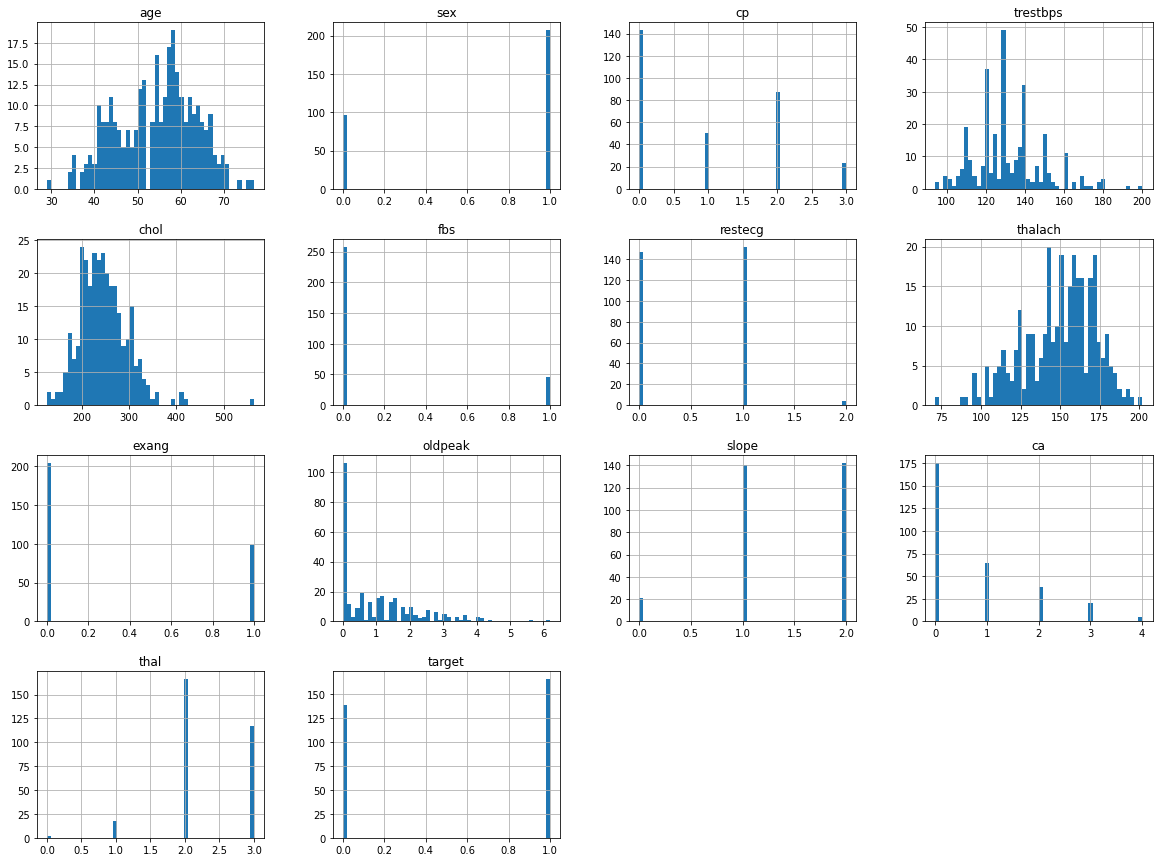

In [468]:
%matplotlib inline
data.hist(bins=50,figsize=(20,15))

In [505]:
def ME_est(xi): # оценка матожидания признака
    n = len(xi)
    summ = 0
    for i in range(n):
        summ += xi.iloc[i]
    summ *= (1/n)
    return summ

In [506]:
col_names = [col for col in data.columns]
print(col_names)
n = len(col_names)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [507]:
ME_est_vec = np.zeros(n)
for i in range(len(col_names)):
    ME_est_vec[i] = ME_est(data[col_names[i]])

In [508]:
def cov_est(xj, xk, j, k, ME_est_vec): #оценка ковариации j-го признака с k-м
    n = len(xj)
    summ = 0
    for i in range(n):
        summ += (xj.iloc[i] - ME_est_vec[j])*(xk.iloc[i] - ME_est_vec[k])
    summ *= (1/n)
    return summ

In [509]:
cov_matrix = np.zeros((n,n)) #оценка ковариационной матрицы
for i in range(n):
    for j in range(n):
        cov_matrix[i,j] = cov_est(data[col_names[i]], data[col_names[j]], i, j, ME_est_vec)
disp_vec_est = [cov_matrix[i,i] for i in range(n)]

In [510]:
data_cn = data.subtract(ME_est_vec)
data_cn = data_cn.divide(np.sqrt(disp_vec_est))

In [511]:
import collections
eig_tuple = np.linalg.eig(cov_matrix) #находим СЗ и СВ ковариационной матрицы признаков
eigvals_cov_pre = eig_tuple[0] 
eigvecs_cov_pre = eig_tuple[1]

dict_eigs = {eigvals_cov_pre[i] : eigvecs_cov_pre[:,i] for i in range(n)}
dict_eigs_sorted = collections.OrderedDict(sorted(dict_eigs.items(), reverse = True))

eigvals_cov_sorted = [k for k, v in dict_eigs_sorted.items()]
eigvecs_cov_sorted = [v for k, v in dict_eigs_sorted.items()]

In [512]:
V = np.array([e for e in eigvecs_cov_sorted]) # матрица из СВ
Lam = np.zeros((n,n))
for i in range(n):
    Lam[i,i] = eigvals_cov_sorted[i] # диагональная матрица с СЗ
V = np.column_stack(eigvecs_cov_sorted)

In [513]:
LamT = np.sqrt(Lam)
LamT = np.linalg.inv(LamT) #нормировка

result_A = LamT @ V.T #матрица перехода к ГК

In [514]:
arr_data_pca = np.zeros((len(data_cn), n))
for i in range(len(data_cn)):
    arr_data_pca[i] = result_A @ data_cn.iloc[i] #преобразуем датасет 

new_col_names = ['{}'.format(i+1) for i in range(n)]
data_pca = pd.DataFrame(arr_data_pca, columns = new_col_names)
print('Преобразованный датасет:')
data_pca.head() 

Преобразованный датасет:


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.003619,0.010217,-0.052508,-0.109318,-0.252336,-2.900044,0.637622,-3.012943,-3.804933,-2.448470,2.201175,-2.100638,6.273231,0.111192
1,-0.000463,-0.083007,0.005948,0.209420,0.925575,-2.780245,-0.313728,-1.206850,0.776914,-2.662491,1.121820,-3.266438,-0.156794,-3.234173
2,-0.017043,-0.053545,0.006333,0.161487,-0.601254,-0.443177,-0.488363,-1.723987,-0.266297,2.486137,-4.005533,0.531979,-0.313777,-0.016787
3,-0.004583,-0.055102,0.027164,-0.061939,-0.815633,-0.136273,-0.367410,-0.503639,1.968030,1.982431,1.059071,-2.251136,0.134568,-1.931478
4,0.039626,-0.027565,0.038180,-0.050855,-0.590540,0.681724,-1.351525,-1.447859,2.442859,0.689406,-0.705050,4.721396,-0.304449,-1.823701


##### Оставим две главные компоненты, посмотрим, сколько информации мы потеряем и построим график точек.

In [515]:
d1 = (eigvals_cov_sorted[0] + eigvals_cov_sorted[1]) / sum(eigvals_cov_sorted)
print('Доля объяснённой дисперсии для двух первых ГК: {}'.format(d1))

Доля объяснённой дисперсии для двух первых ГК: 0.8978857904939239


In [516]:
data_pca_2cols = data_pca[['1', '2']].copy()
data_pca_2cols.head() #датасет с двумя признаками (ГК)

,1,2
0,-0.003619,0.010217
1,-0.000463,-0.083007
2,-0.017043,-0.053545
3,-0.004583,-0.055102
4,0.039626,-0.027565


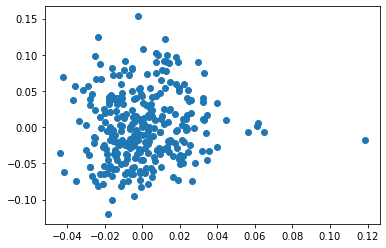

In [517]:
X = np.array(data_pca_2cols['1'])
Y = np.array(data_pca_2cols['2'])
plt.scatter(X,Y)

### Кластеризация. Метод k средних.

In [518]:
#Функции расстояния 

def Euclidian_dist(Xi, Xj):
    return np.sqrt((Xi - Xj).T @ (Xi - Xj))

def Euclidian_dist_weighted(Xi, Xj, Lam):
    return np.sqrt((Xi - Xj).T @ Lam @ (Xi - Xj))

def Mahalanobis_dist(Xi, Xj, cov_matrix):
    return (Xi - Xj).T @ np.linalg.inv(cov_matrix) @ (Xi - Xj)
    
def Manhattan_dist(Xi, Xj):
    summ = 0
    for k in range(len(Xi)):
        summ += abs(Xi[k] - Xj[k])
    return summ

def Chebyshev_dist(Xi, Xj):
    dists = Xi - Xj
    return max(dists)

In [493]:
def k_mean(data, p, dist_func):
    n = len(data)
    m = len(data.iloc[0])
    indexes = np.random.randint(n, size = p) #случайно выбираем центроиды кластеров
    centroids = [data.iloc[i] for i in indexes] 
    objects_to_clusters = np.full(n, -1)
    centroids_prev = np.zeros(p)
    i = 0
    while(not(equality_for_arr_of_series(centroids, centroids_prev))):
        centroids_prev = centroids.copy()
        distances = np.zeros((p,n))
        for k in range(p):
            for j in range(n):
                distances[k, j] = dist_func(centroids[k], data.iloc[j])
        for j in range(n):
            dist_obj_from_centroids = distances[:, j]
            objects_to_clusters[j] = np.argmin(dist_obj_from_centroids)
            for k in range(p):
                summ = np.zeros(m)
                ns = 1
                for j in range(n):
                    if objects_to_clusters[j] == k:
                        summ += data.iloc[j]
                        ns += 1
                #print(ns)
                centroids[k] = (1/ns) * summ 
        i+=1
        print(i)
            
    return objects_to_clusters

def equality_for_arr_of_series(arr1, arr2):
    for i in range(len(arr1)):
        if (not (arr1[i].equals(arr2[i]))):
            return False
    return True

In [494]:
clustered = k_mean(data, 2, Euclidian_dist)
clustered

1
2
3
4
5
6


array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [520]:
data['clusters'] = clustered
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clusters
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [521]:
clusters_set = set()

### Классификация алгоритмом "k ближайших соседей"

In [522]:
from sklearn.model_selection import train_test_split

X_names = [col for col in data_cn.columns if col != 'target' and col != 'clusters']
y_name = 'target'
X = data[X_names]
y = data[y_name]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [523]:
from collections import Counter

def knn(train_X, train_y, val_X, dist_func, weights_arr):
    
    if (len(weights_arr) != len(train_X)):
        print("Неправильная длина массива весов")
    val_y_hat = np.zeros(len(val_y))
    
    for j in range(len(val_X)): #для каждой точки в контрольной выборке
        distances = np.zeros(len(train_X)) 
        for i in range(len(train_X)): # измеряем расстояния до всех точек в тренировочной выборке
            distances[i] = dist_func(val_X.iloc[j], train_X.iloc[i]) 
        
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=train_y.index) #создаём датасет расстояний
        df_dists['t_y'] = train_y
        df_nn = df_dists.sort_values(by=['dist'], axis=0) #сортируем его 
        df_nn['weights'] = weights_arr
    
        classes_set = set(train_y)
        classes_list = list(classes_set)
        dic = {c : 0 for c in classes_list}
        
        for c in classes_list: # ищем номер класса  для которого сумма весов максимальна
            summ = 0
            for i in range(len(df_nn)):
                if (df_nn.iloc[i])['t_y'] == c:
                    summ += (df_nn.iloc[i])['weights'] 
            dic[c] = summ
            
        max_c = max(dic, key = dic.get)
        val_y_hat[j] = max_c
        
    return val_y_hat
            

In [524]:
q_arr = np.arange(0.1, 1, 0.1)
for q in q_arr:
    weights_arr = [q ** i for i in range(len(train_X))]
    val_y_hat = knn(train_X, train_y, val_X, Euclidian_dist, weights_arr)
    acc_arr2.append(accuracy_score(val_y, val_y_hat))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(q_arr, acc_arr1)
ax.set_xlabel('q - число между 0 и 1')

NameError: name 'acc_arr2' is not defined

knn с весами, убывающими как: $w = q^i$, где  $q = 0.75$

In [454]:
weights_arr = [0.8 ** i for i in range(len(train_X))]
val_y_hat = knn(train_X, train_y, val_X, Euclidian_dist, weights_arr)
accuracy_score(val_y, val_y_hat)

0.639344262295082

На центрированных и нормированных данных точность существенно возрастает:

In [459]:
X = data_cn[X_names]
y = data_cn[y_name]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

weights_arr = [0.8 ** i for i in range(len(train_X))]
val_y_hat = knn(train_X, train_y, val_X, Euclidian_dist, weights_arr)

mistakes = 0
for y_true, y_est in zip(val_y, val_y_hat):
    if y_true != y_est:
        mistakes+=1
print(1 - mistakes/len(val_X))

0.8360655737704918


Классический knn (k = 15):

In [460]:
weights_arr = [1/15 if i <= 15 else 0 for i in range(len(train_X))]
val_y_hat = knn(train_X, train_y, val_X, Euclidian_dist, weights_arr)

mistakes = 0
for y_true, y_est in zip(val_y, val_y_hat):
    if y_true != y_est:
        mistakes+=1
print(1 - mistakes/len(val_X))

0.8524590163934427


### Классификация алгоритмом "Наивный Байесовский классификатор"

Ядерные функции:

In [417]:
def kernel_gauss(x): # гауссовское ядро
    return (1/(np.sqrt(2*np.pi))) * np.exp(-0.5*(x**2))

def kernel_epanech(x): # ядро Епанечникова
    return 0.75*(1-x**2) if np.abs(x) < 1 else 0

def kernel_bisquare(x): # биквадратное ядро
    return (15/16)*((1-x**2)**2) if np.abs(x) < 1 else 0

In [429]:
def kde(xj, j, h, X, y, kernel, c):
    summ = 0
    for i in range(len(X)):
        if y.iloc[i] == c:
            summ += kernel((xj - X.iloc[i, j]) / h)
            #print(summ)
    summ *= 1/(len(data) * h)
    return summ

In [438]:
def naive_bayes(train_X, train_y, val_X, kernel, h):
    
    val_y_hat = np.full(len(val_X), -1.0)
    classes_set = set(train_y)
    classes_list = list(classes_set) 
    dicc = {c : 0 for c in classes_list} 
    for c in dicc.keys():
        for i in range(len(train_y)):
            if train_y.iloc[i] == c:
                dicc[c] += 1 # считаем количество экземпляров каждого класс
                
    dicPk = {k: v/len(train_y) for k, v in dicc.items()} #считаем вероятности попадания в каждый из классов
    #print(dicPk)
    
    for i in range(len(val_X)):
        dics = {c : 0 for c in classes_list}
        for c in dics.keys():
            prod = dicPk[c]
            for j in range(len(val_X.columns)): #перемножаем вероятность на плотности
                #print(kde(val_X.iloc[i, j], j, h, train_X, kernel))
                prod *= kde(val_X.iloc[i, j], j, h, train_X, train_y, kernel, c) #считаем ядерную оценку условных плотностей
            #print(prod)
            dics[c] = prod  
        #print(dics)
        max_c = max(dics, key = dics.get) # выбираем класс с максимальным значением 
        val_y_hat[i] = max_c
        
    return val_y_hat

Подбираем сносную ширину полосы для каждого ядра (по какому-нибудь одному признаку).

Гауссовское:

In [450]:
X = data[X_names]
y = data[y_name]
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 123)

Text(0.5, 1.0, 'h = 1')

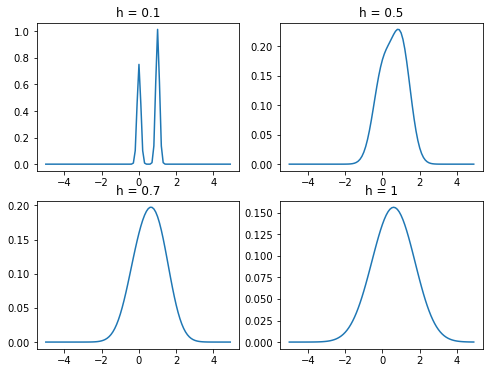

In [432]:
kde_list1 = [kde(xj, 1 ,0.1, train_X, train_y, kernel_gauss, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list2 = [kde(xj, 1 ,0.5, train_X, train_y, kernel_gauss, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list3 = [kde(xj, 1 ,0.7, train_X, train_y, kernel_gauss, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list4 = [kde(xj, 1 , 1, train_X, train_y, kernel_gauss, 1) for xj in np.arange(-5, 5, 0.1)]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))
ax1.plot(np.arange(-5, 5, 0.1), kde_list1)
ax1.set_title("h = 0.1")
ax2.plot(np.arange(-5, 5, 0.1), kde_list2)
ax2.set_title("h = 0.5")
ax3.plot(np.arange(-5, 5, 0.1), kde_list3)
ax3.set_title("h = 0.7")
ax4.plot(np.arange(-5, 5, 0.1), kde_list4)
ax4.set_title("h = 1")

Епанечникова:

Text(0.5, 1.0, 'h = 1')

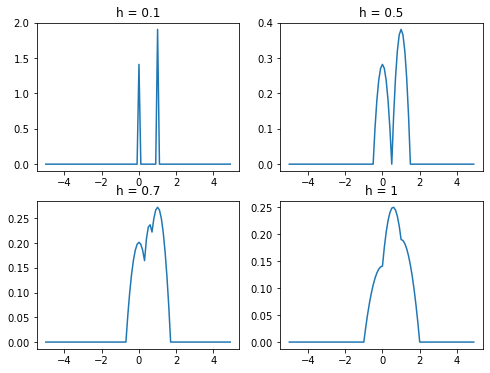

In [435]:
kde_list1 = [kde(xj, 1 ,0.1, train_X, train_y, kernel_epanech, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list2 = [kde(xj, 1 ,0.5, train_X, train_y, kernel_epanech, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list3 = [kde(xj, 1 ,0.7, train_X, train_y, kernel_epanech, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list4 = [kde(xj, 1 , 1, train_X, train_y, kernel_epanech, 1) for xj in np.arange(-5, 5, 0.1)]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))
ax1.plot(np.arange(-5, 5, 0.1), kde_list1)
ax1.set_title("h = 0.1")
ax2.plot(np.arange(-5, 5, 0.1), kde_list2)
ax2.set_title("h = 0.5")
ax3.plot(np.arange(-5, 5, 0.1), kde_list3)
ax3.set_title("h = 0.7")
ax4.plot(np.arange(-5, 5, 0.1), kde_list4)
ax4.set_title("h = 1")

Text(0.5, 1.0, 'h = 1')

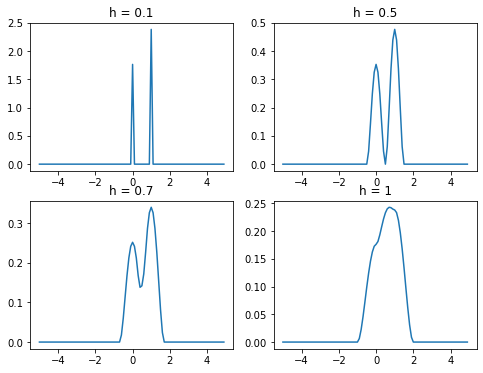

In [436]:
kde_list1 = [kde(xj, 1 ,0.1, train_X, train_y, kernel_bisquare, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list2 = [kde(xj, 1 ,0.5, train_X, train_y, kernel_bisquare, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list3 = [kde(xj, 1 ,0.7, train_X, train_y, kernel_bisquare, 1) for xj in np.arange(-5, 5, 0.1)]
kde_list4 = [kde(xj, 1 , 1, train_X, train_y, kernel_bisquare, 1) for xj in np.arange(-5, 5, 0.1)]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,6))
ax1.plot(np.arange(-5, 5, 0.1), kde_list1)
ax1.set_title("h = 0.1")
ax2.plot(np.arange(-5, 5, 0.1), kde_list2)
ax2.set_title("h = 0.5")
ax3.plot(np.arange(-5, 5, 0.1), kde_list3)
ax3.set_title("h = 0.7")
ax4.plot(np.arange(-5, 5, 0.1), kde_list4)
ax4.set_title("h = 1")

Точность классификации (гауссовское ядро):

In [451]:
from sklearn.metrics import accuracy_score

val_y_hat_bayes = naive_bayes(train_X, train_y, val_X, kernel_gauss, 0.7)
accuracy_score(val_y, val_y_hat_bayes)

0.6885245901639344

Для центрированных и нормированных данных точность возрастает:

In [440]:
X = data_cn[X_names]
y = data_cn[y_name]
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 213)

In [447]:
from sklearn.metrics import accuracy_score

val_y_hat_bayes = naive_bayes(train_X, train_y, val_X, kernel_gauss, 0.7)
#accuracy_score(val_y, val_y_hat_bayes)
mistakes = 0
for y_true, y_est in zip(val_y, val_y_hat_bayes):
    if y_true != y_est:
        mistakes+=1
print(1 - mistakes/len(val_X))
acc_gauss_cn = 1 - mistakes/len(val_X)

0.819672131147541


In [442]:
val_y_hat_bayes = naive_bayes(train_X, train_y, val_X, kernel_epanech, 1.0)
#accuracy_score(val_y, val_y_hat_bayes)
mistakes = 0
for y_true, y_est in zip(val_y, val_y_hat_bayes):
    if y_true != y_est:
        mistakes+=1
print(1 - mistakes/len(val_X))
acc_epanech_cn = 1 - mistakes/len(val_X)

0.7704918032786885


In [445]:
val_y_hat_bayes = naive_bayes(train_X, train_y, val_X, kernel_bisquare, 1.0)
#accuracy_score(val_y, val_y_hat_bayes)
mistakes = 0
for y_true, y_est in zip(val_y, val_y_hat_bayes):
    if y_true != y_est:
        mistakes+=1
print(1 - mistakes/len(val_X))
acc_bisquare_cn = 1 - mistakes/len(val_X)

0.8032786885245902


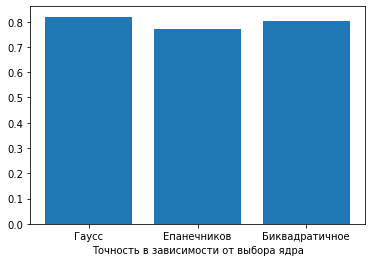

In [449]:
Values = [acc_gauss_cn, acc_epanech_cn, acc_bisquare_cn]
Names = ['Гаусс', 'Епанечников', 'Биквадратичное']
plt.bar(Names, Values)
plt.xlabel('Точность в зависимости от выбора ядра')
plt.show()